# Traffic Sign Classification with Keras

Keras exists to make coding deep neural networks simpler. To demonstrate just how easy it is, you’re going to use Keras to build a convolutional neural network in a few dozen lines of code.

You’ll be connecting the concepts from the previous lessons to the methods that Keras provides.

## Dataset

The network you'll build with Keras is similar to the example in Keras’s GitHub repository that builds out a [convolutional neural network for MNIST](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py). 

However, instead of using the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, you're going to use the [German Traffic Sign Recognition Benchmark](http://benchmark.ini.rub.de/?section=gtsrb&subsection=news) dataset that you've used previously.

You can download pickle files with sanitized traffic sign data here:

In [1]:
import numpy as np
import pandas as pd

fileloc = 'Center_Lap_01/'
fileloc2 = 'Off_Track_02/'
csvfilename = fileloc + 'driving_log.csv'
csvfilename2 = fileloc2 + 'driving_log.csv'
hd = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
df1 = pd.read_csv(csvfilename, names = hd)
print(df1['center'][1][70:])
df2 = pd.read_csv(csvfilename2, names = hd)
print(df2['center'][1][70:])

# print(df2[0])



df = df1.append(df2, ignore_index=True)

# numpy_array = df.as_matrix()
original_headers = list(df.columns.values)
print(original_headers)


print(df['center'][2][70:])

print(df['steering'][1298])
print(df['steering'][1:10])
# print(df['steering'][8035])
print(df['center'][0:3])

print(df.shape)
print(df2.shape)

Center_Lap_01/IMG/center_2017_02_22_19_53_05_041.jpg
Off_Track_02/IMG/center_2017_02_22_20_09_02_131.jpg
['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
Center_Lap_01/IMG/center_2017_02_22_19_53_05_107.jpg
-0.4
1    0.00
2    0.00
3    0.00
4    0.00
5    0.00
6    0.00
7    0.00
8    0.00
9   -0.05
Name: steering, dtype: float64
0    /home/mahesh/udacity/CarND-Behavioral-Cloning-...
1    /home/mahesh/udacity/CarND-Behavioral-Cloning-...
2    /home/mahesh/udacity/CarND-Behavioral-Cloning-...
Name: center, dtype: object
(8653, 7)
(2086, 7)


In [2]:
print(df['center'][80])

/home/mahesh/udacity/CarND-Behavioral-Cloning-P3/beta_simulator_linux/Center_Lap_01/IMG/center_2017_02_22_19_53_11_210.jpg


<class 'numpy.ndarray'>
(160, 320, 3)


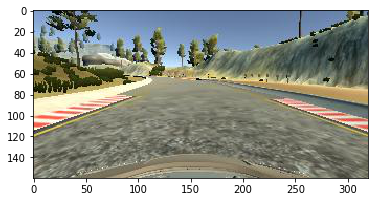

In [3]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
imnum = [10, 13, 19]

fname = [df['center'][i][70:] for i in imnum]
# fname2 = [df2['center'][i][70:] for i in imnum]




# im1 = cv2.imread(filename1)[::1]
im = [cv2.imread(f)[...,::-1] for f in fname]



im_crop = np.array([image[60:140,:] for image in im])

print(type(im[0]))
print(im[0].shape)
# plt.figure(figsize=(1,1))
plt.imshow(im[0])

## Resize

X train size:  (3, 50, 50, 3)
y train size:  (3,)
[-0.25      -0.8500001 -0.05     ]


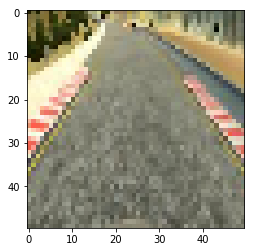

In [4]:
new_size = (32,32)

im_resized = np.array([cv2.resize(image, (50,50)) for image in im_crop])#, fx=0.25, fy=0.5) 

X_traindemo = im_resized
y_traindemo = np.array([df['steering'][i] for i in imnum])
# plt.figure(figsize=(1,1))
plt.imshow(im_resized[0])
print('X train size: ', X_traindemo.shape)

print('y train size: ', y_traindemo.shape)
print(y_traindemo)

## Overview

Here are the steps you'll take to build the network:

1. Load the training data.
2. Preprocess the data.
3. Build a feedforward neural network to classify traffic signs.
4. Build a convolutional neural network to classify traffic signs.
5. Evaluate the final neural network on testing data.

Keep an eye on the network’s accuracy over time. Once the accuracy reaches the 98% range, you can be confident that you’ve built and trained an effective model.

In [5]:

# import numpy as np
import math

# Fix error with TF and Keras
import tensorflow as tf
tf.python.control_flow_ops = tf

print('Modules loaded.')

Modules loaded.


## Load the Data

Start by importing the data from the pickle file.

In [21]:
from sklearn.utils import shuffle
imnum = range(int(df.shape[0]))
print(max(imnum))

fname = [df['center'][i][70:] for i in imnum]


fname_left= [df['left'][i][70:] for i in imnum]

fname_right= [df['right'][i][70:] for i in imnum]



# im1 = cv2.imread(filename1)[::1]
# im = [cv2.imread(f)[...,::-1] for f in fname]


# X_train = image_preprocess([cv2.imread(f)[...,::-1] for f in fname])
X_train = np.array(([cv2.imread(f)[...,::-1] for f in fname]))
y_train = np.array([df['steering'][i] for i in imnum])

# X_train2 = [np.fliplr(image) for image in X_train]
# y_train2 = -1*y_train

# X_train = np.concatenate([X_train2, X_train])
# y_train = np.concatenate([y_train2, y_train])


for i in range(2):
    X_train, y_train = shuffle(X_train, y_train)
    
print(X_train.shape)
print(y_train.shape)
# print(y_train)


8652
(8653, 160, 320, 3)
(8653,)


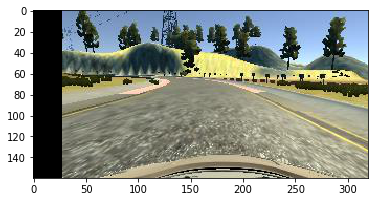

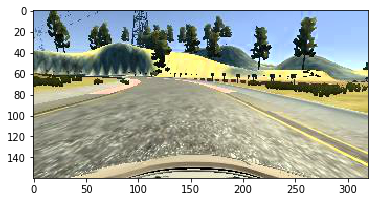

In [23]:
import cv2

def brightness(image):
    rand_beta = .7 + np.random.uniform(0, 0.6)
    
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype = np.float64)
    
    image1[:, :, 2] = image1[:, :, 2]*rand_beta
    
   
    image1[:,:,2][image1[:,:,2]>255]  = 255
    
    image1 = image1.astype('B') 

    image1 = cv2.cvtColor(image1, cv2.COLOR_HSV2RGB)
    
    return image1

def translate_data(image, maxtransx, maxtransy):
    
    nrow = image.shape[0]
    ncol = image.shape[1]

    
    
#   Translation in x and y direction by number of pixels 
    tr_x =  np.random.randint(maxtransx) - maxtransx/2
    tr_y =  np.random.randint(maxtransy) - maxtransy/2  

    

   
    
    Trans_matrix = np.array([[1,0,tr_x],[0,1,tr_y]])   
    
    image_new = cv2.warpAffine(image, Trans_matrix,(ncol, nrow))

#   Convert float 64 to uint8 to save memory
    image_new = image_new.astype('B') 
    return image_new

plt.imshow(translate_data(X_train[11], 80, 10))

plt.figure()
plt.imshow(brightness(X_train[11]))

## Generator & data augmentation

In [7]:
# i = 0
# def generate_data(X_train, y_train, batchsize):
#     istart = 0
#     batchsize = len(y_train)//(len(y_train)//batchsize)
#     while True:
        
#         iend = istart + batchsize
#         istart = iend
#         yield (X_train[istart:iend], y_train[istart:iend])

def generate_data(batchsize):

    while True:
        for i in range(len(y_train)//batchsize+1):
            
            
            print("Number of batchstart:", i)

            yield X_train[i*batchsize:(i+1)*batchsize], y_train[i*batchsize:(i+1)*batchsize]

a = generate_data(2)

In [21]:

print(next(a)[0][0][0])

Number of batchstart: 3
[[124 153 195]
 [124 153 195]
 [123 152 194]
 [123 152 194]
 [123 152 194]
 [122 151 193]
 [122 151 193]
 [122 151 193]
 [122 151 193]
 [122 151 193]
 [121 150 192]
 [121 150 192]
 [121 150 192]
 [120 149 191]
 [120 149 191]
 [120 149 191]
 [120 149 191]
 [120 149 191]
 [119 148 190]
 [119 148 190]
 [119 148 190]
 [118 147 189]
 [118 147 189]
 [118 147 189]
 [117 146 188]
 [117 146 188]
 [116 145 187]
 [116 145 187]
 [116 145 187]
 [115 144 186]
 [115 144 186]
 [115 144 186]
 [114 143 185]
 [114 143 185]
 [113 142 184]
 [113 142 184]
 [113 142 184]
 [112 141 183]
 [112 141 183]
 [112 141 183]
 [112 141 183]
 [112 141 183]
 [111 140 182]
 [111 140 182]
 [111 140 182]
 [110 139 181]
 [110 139 181]
 [110 139 181]
 [110 138 178]
 [110 138 178]
 [109 137 177]
 [109 137 177]
 [109 137 177]
 [108 136 176]
 [108 136 176]
 [108 136 176]
 [109 137 177]
 [109 137 177]
 [108 136 176]
 [108 136 176]
 [108 136 176]
 [107 135 175]
 [107 135 175]
 [107 135 175]
 [107 135 175]
 

## Train the Network

1. Compile the network using adam optimizer and categorical_crossentropy loss function.
2. Train the network for ten epochs and validate with 20% of the training data.

In [8]:
# TODO: Re-construct the network and add dropout after the pooling layer.
from keras.models import Sequential
from keras.layers import Dropout, Convolution2D, MaxPooling2D, Lambda, Cropping2D 
from keras.layers.core import Dense, Activation, Flatten

nb_filters = 20
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)
input_shape = (160, 320,3)
pool_size = (2, 2)
# model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
#                         border_mode='valid',
#                         input_shape=input_shape))
model = Sequential()
model.add(Cropping2D(cropping=((60, 20), (0, 0)), input_shape=input_shape))
model.add(Lambda(lambda x: -0.5 + x/255.0))

model.add(Convolution2D(nb_filters, 5, 5))
# model.add(MaxPooling2D(pool_size=pool_size))
          
model.add(Convolution2D(nb_filters, 5, 5))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Convolution2D(nb_filters, 3, 3))
model.add(Convolution2D(nb_filters, 3, 3))
model.add(MaxPooling2D(pool_size=pool_size))




model.add(Convolution2D(nb_filters, 3, 3))
model.add(MaxPooling2D(pool_size=pool_size))
          
model.add(Dropout(0.50))
model.add(Activation('relu'))
          
model.add(Flatten())
model.add(Dense(600))
model.add(Activation('relu'))
model.add(Dense(190))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dense(1))

# model.add(Activation('softmax'))

Using TensorFlow backend.


In [9]:
print(y_train.shape)
print(X_train.shape)

(8653,)
(8653, 160, 320, 3)


In [10]:



# model.compile('adam', 'categorical_crossentropy', ['accuracy'])
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])
# history = model.fit(X_train, y_train, batch_size=128*2, nb_epoch=2, validation_split=0.25)
history = model.fit_generator(generate_data(128*2), samples_per_epoch = len(y_train), nb_epoch = 2)#, verbose=2, callbacks=[], validation_data=None, class_weight=None, nb_worker=1)

Number of batchstart:Epoch 1/2 
0
Number of batchstart: 1
Number of batchstart: 2
Number of batchstart: 3
Number of batchstart: 4
Number of batchstart: 5
Number of batchstart: 6
Number of batchstart: 7
Number of batchstart: 8
Number of batchstart: 9
Number of batchstart: 10
8653/8653 [==============================] - 74s - loss: 0.0911 - mean_squared_error: 0.0479    
Epoch 2/2
Number of batchstart: 10
8653/8653 [==============================] - 61s - loss: 0.0860 - mean_squared_error: 0.0464    


## Optimization
Congratulations! You've built a neural network with convolutions, pooling, dropout, and fully-connected layers, all in just a few lines of code.

Have fun with the model and see how well you can do! Add more layers, or regularization, or different padding, or batches, or more training epochs.

What is the best validation accuracy you can achieve?

In [ ]:
# TODO: Build a model
preds = model.predict(X_train[1190:1310])
print("Pred = ", preds.T, "\nSteering angle = ", y_train[1190:1310])
# TODO: Compile and train the model

**Best Validation Accuracy:** (fill in here)

## Testing
Once you've picked out your best model, it's time to test it.

Load up the test data and use the [`evaluate()` method](https://keras.io/models/model/#evaluate) to see how well it does.

Hint 1: The `evaluate()` method should return an array of numbers. Use the [`metrics_names`](https://keras.io/models/model/) property to get the labels.

In [ ]:


# TODO: Evaluate model on test data
# test_score = model.evaluate(X_normalized_test, y_one_hot_test)
val_score = model.evaluate(X_train, y_train)

print(val_score)

**Test Accuracy:** (84.37)

## Save Model

In [ ]:
from keras.models import load_model

model.save('model_user_trainigdata_generator_07.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# # returns a compiled model
# # identical to the previous one
# model = load_model('model_trial_allsampledata_02.h5')

## Summary
Keras is a great tool to use if you want to quickly build a neural network and evaluate performance.

### Hello

second
third